# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load dataset

In [2]:
dataset = pd.read_csv('data/celebdf_features.csv',sep=',')

In [3]:
dataset.head(5)

,filename,is_deepfake,face_detection_ratio,face_detector_0_ratio,face_detector_1_ratio,eye-blink-ratio,F-H-avg-value,F-H-variance-value,F-H-avg-change,F-H-max-change,...,O-hu-5-avg-change,O-hu-5-max-change,O-hu-5-avg-interp-diff,O-hu-5-max-interp-diff,O-hu-6-avg-value,O-hu-6-variance-value,O-hu-6-avg-change,O-hu-6-max-change,O-hu-6-avg-interp-diff,O-hu-6-max-interp-diff
0,id24_id25_0005,1,1.0,1.0,0.0,0.0297,10.2947,0.1848,0.1568,0.6384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,id43_id47_0000,1,1.0,1.0,0.0,0.0188,10.7345,0.0448,0.1132,0.4013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,id10_id7_0008,1,1.0,1.0,0.0,0.0026,9.5433,0.8177,0.2985,2.4350,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
3,id31_id38_0001,1,1.0,1.0,0.0,0.0054,35.1457,44.7263,4.4102,17.4778,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0
4,id43_id46_0001,1,1.0,1.0,0.0,0.0293,10.6863,0.6932,0.2362,2.6182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print("Deepfakes: {}".format(sum(dataset['is_deepfake'] == 1)))
print("Reals: {}".format(sum(dataset['is_deepfake'] == 0)))

Deepfakes: 1000
Reals: 889


In [5]:
id_label = 'filename'
y_label = 'is_deepfake'
facial_features = [x for x in dataset.columns.values if x[0] == 'F' and x[1:6] != '-hog-']
hog_features = [x for x in dataset.columns.values if x[1:6] == '-hog-']
outsite_features = [x for x in dataset.columns.values if x[0] == 'O']
other_features = [x for x in dataset.columns.values if x[0] not in ['F', 'O'] and x not in [y_label, id_label]]

In [6]:
print("facial_features: {}".format(len(facial_features)))
print("hog_features: {}".format(len(hog_features)))
print("outsite_features: {}".format(len(outsite_features)))
print("other_features: {}".format(len(other_features)))

facial_features: 126
hog_features: 3456
outsite_features: 114
other_features: 4


In [7]:
features_to_show = ["F-Contast-avg-value", "F-Contast-max-change", "F-Noise-avg-change",\
                    "F-Pos-avg-change", "F-S-avg-change", "F-Sharp-avg-change", "F-SRM3-G-avg-change",\
                    "F-SRM5-R-avg-change", "F-V-avg-interp-diff"]

# Histograms

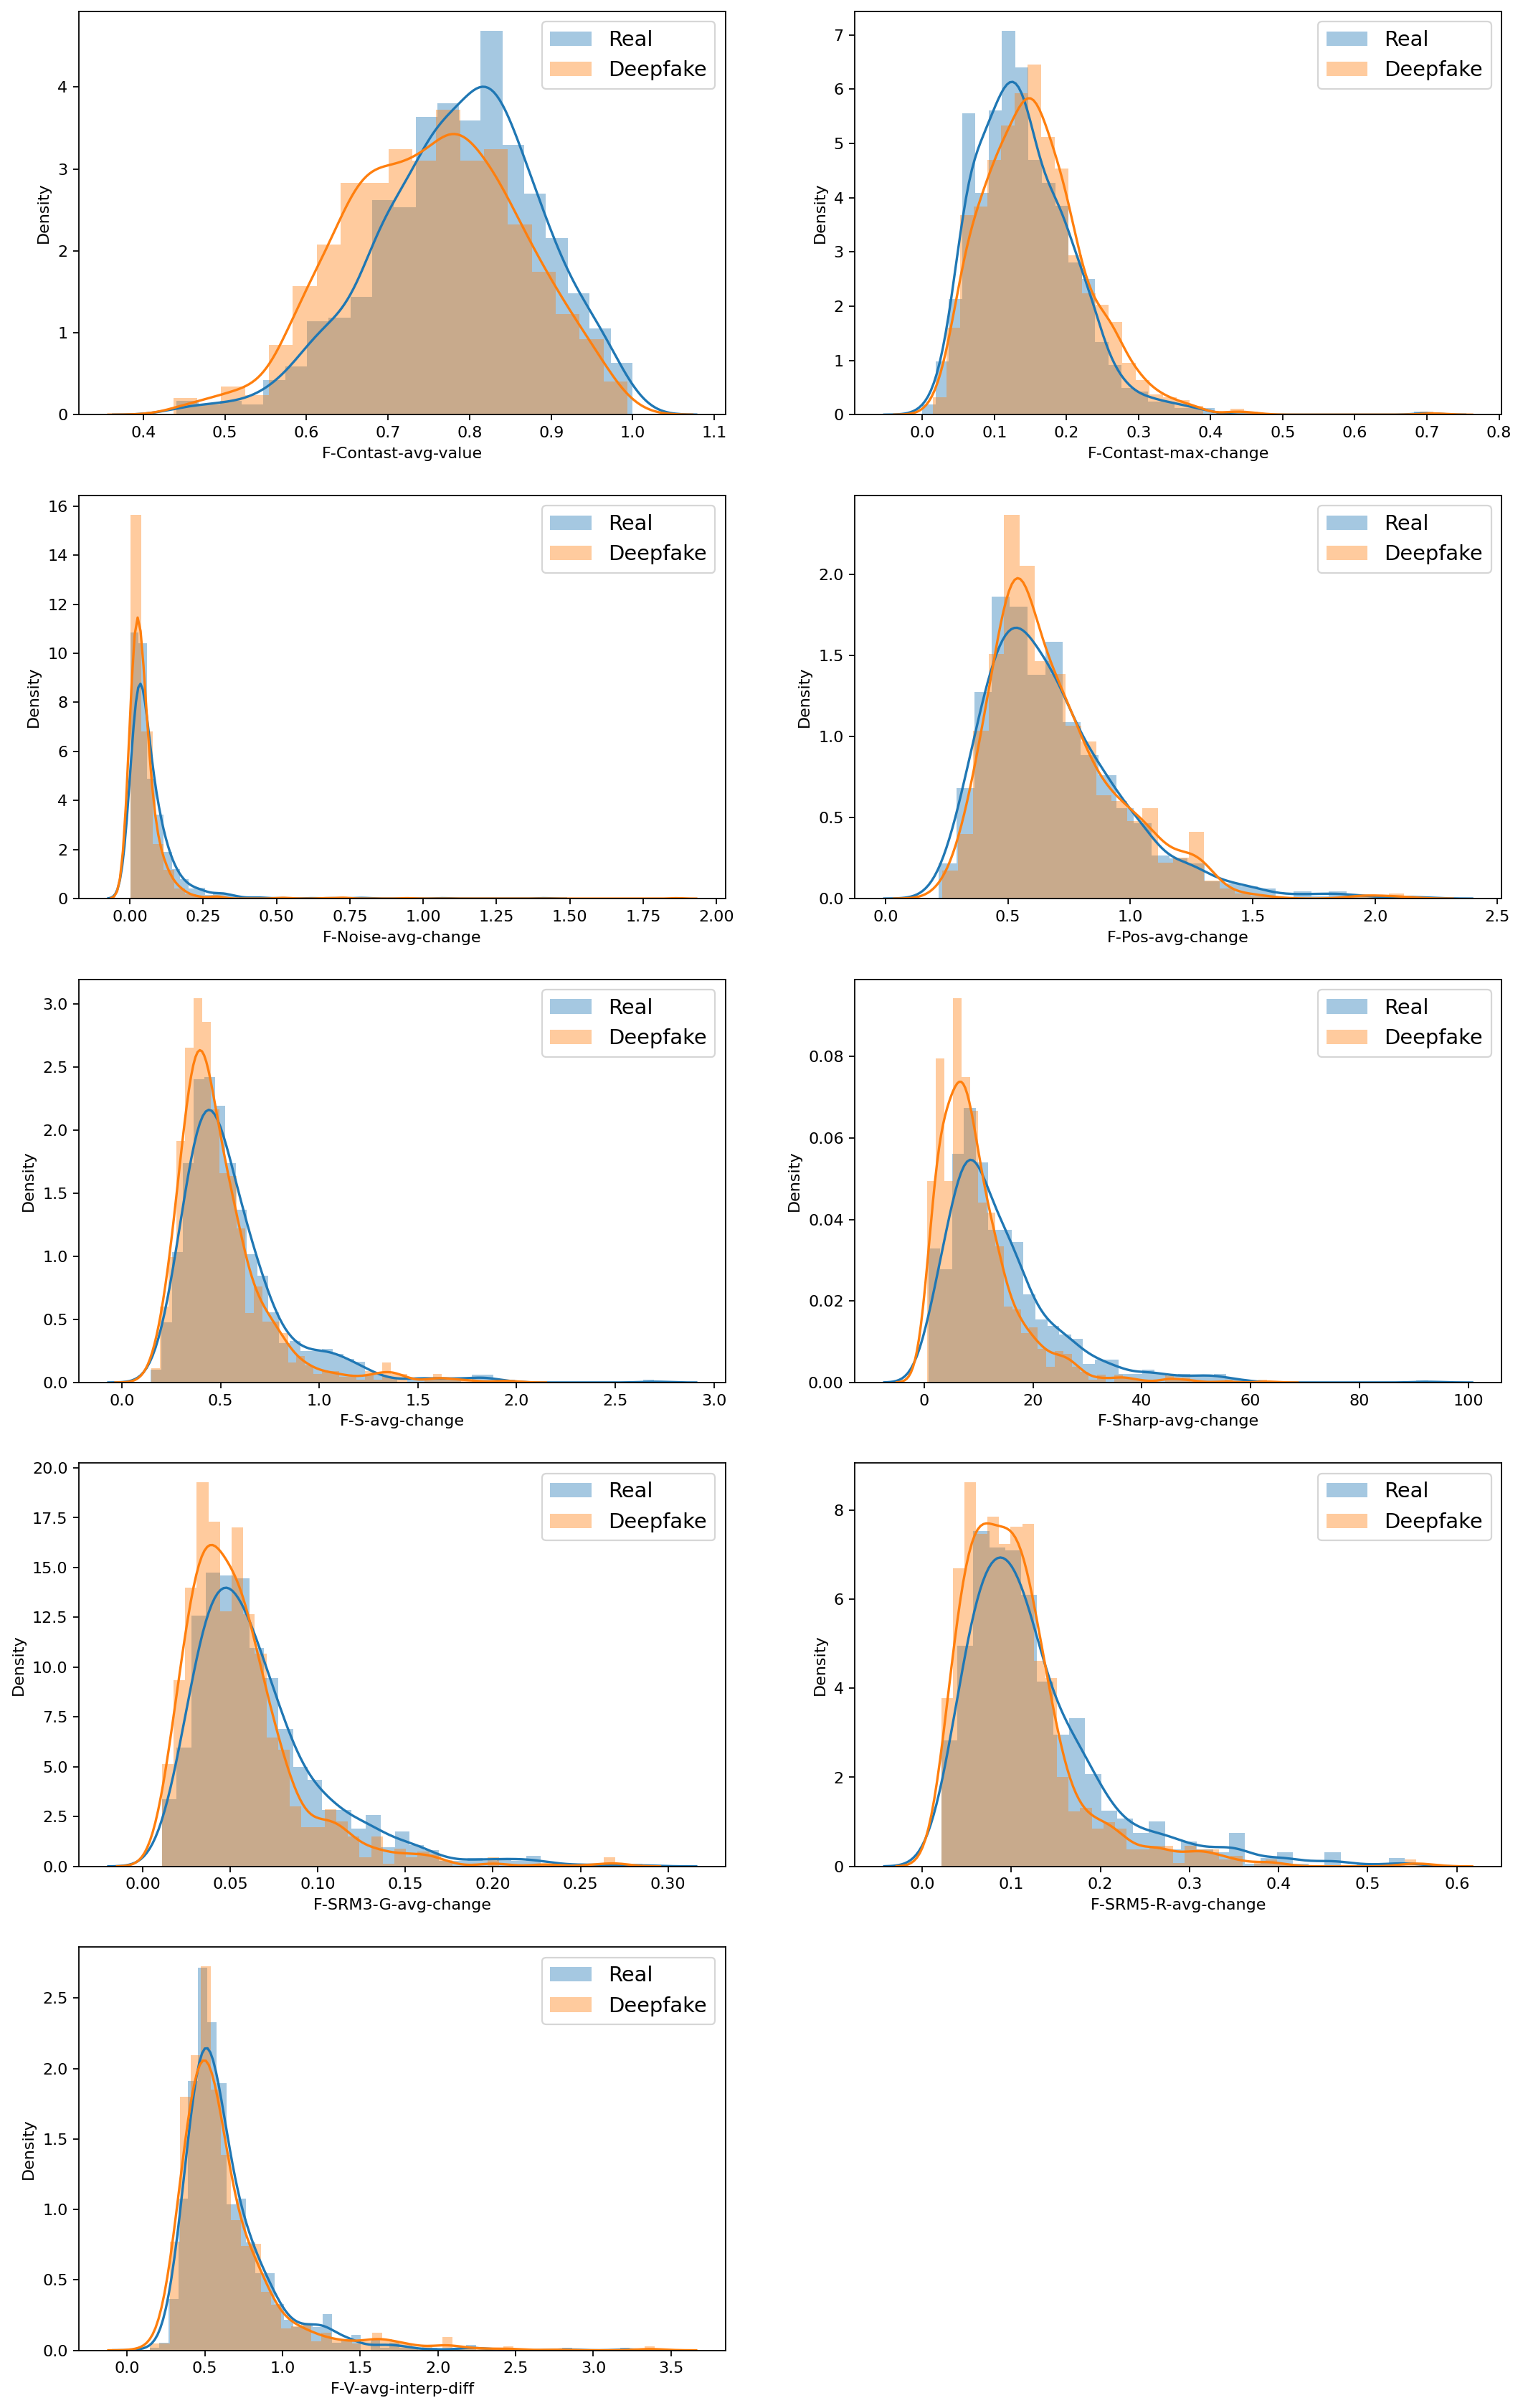

In [8]:
plt.figure(figsize=(16, len(features_to_show) * 3), dpi= 160)
for idx, feature in enumerate(features_to_show):
    plt.subplot(int(len(features_to_show) / 2) + 1, 2, idx + 1)
    sns.distplot(dataset.loc[dataset.is_deepfake == 0, feature], label="Real")
    sns.distplot(dataset.loc[dataset.is_deepfake == 1, feature], label="Deepfake")
    
    plt.legend(fontsize=13)

# Box plots

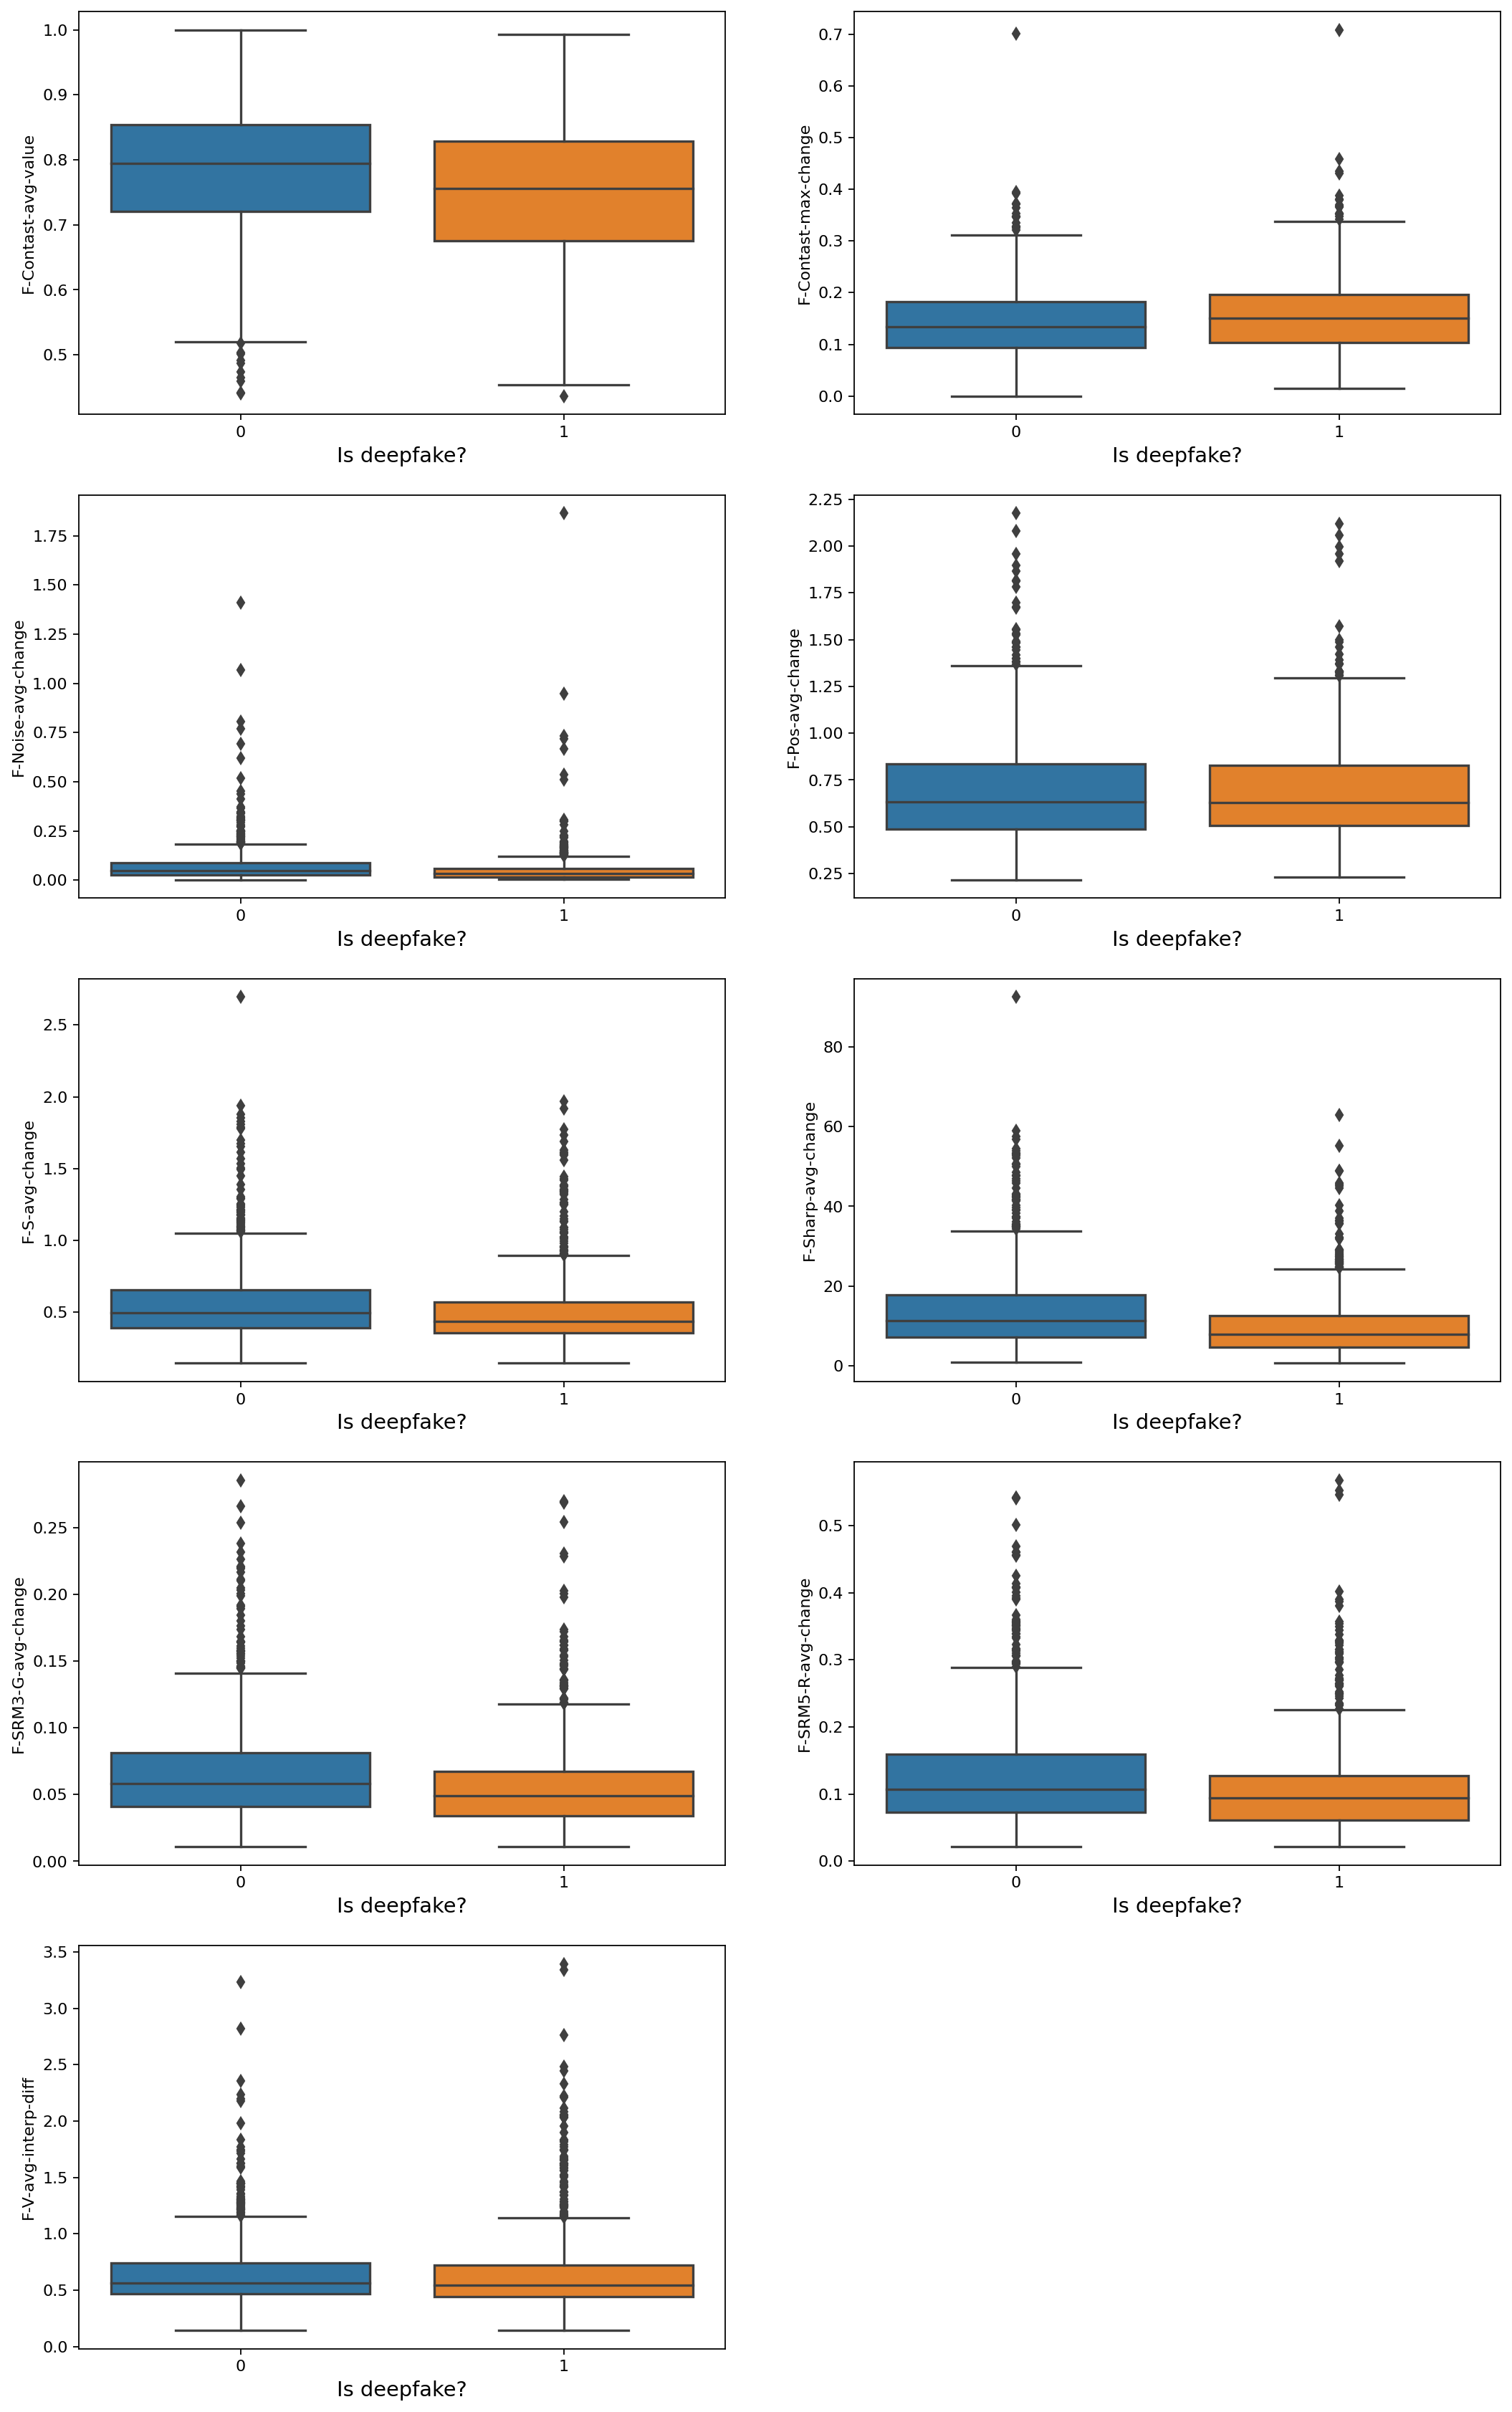

In [9]:
plt.figure(figsize=(16, len(features_to_show) * 3), dpi= 160)
for idx, feature in enumerate(features_to_show):
    plt.subplot(int(len(features_to_show) / 2) + 1, 2, idx + 1)
    b = sns.boxplot(x=y_label, y=feature, data=dataset)
    b.set_xlabel("Is deepfake?", fontsize=13)

# Pair plot

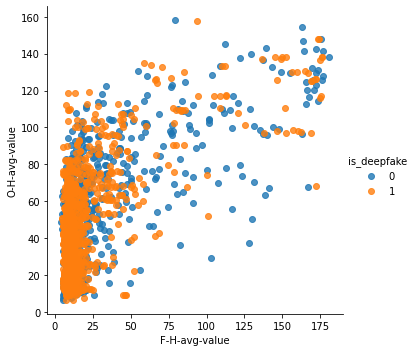

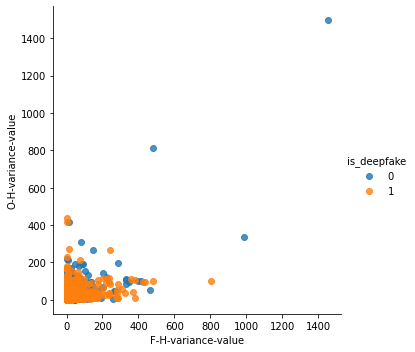

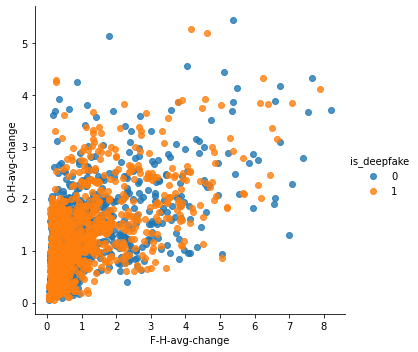

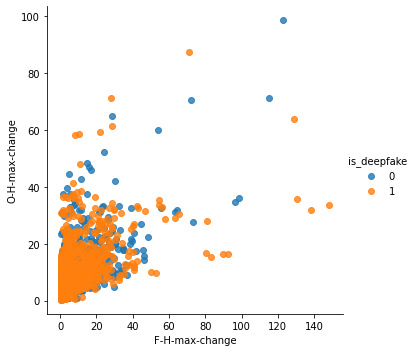

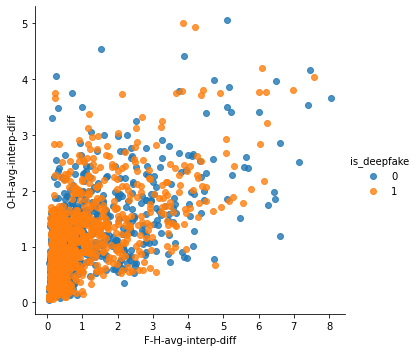

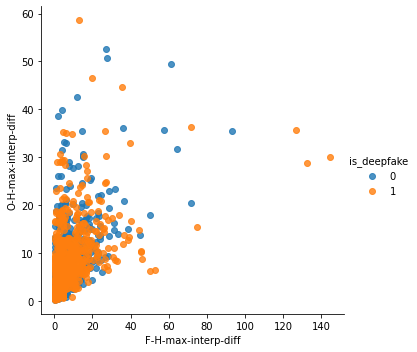

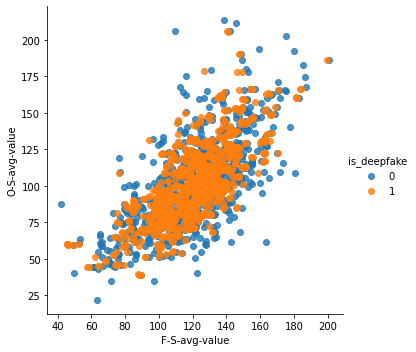

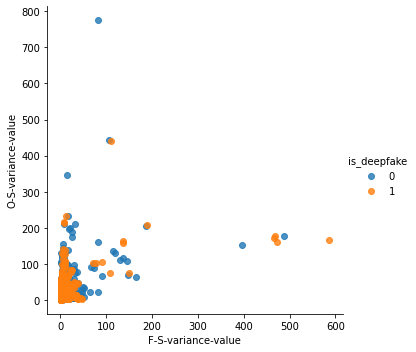

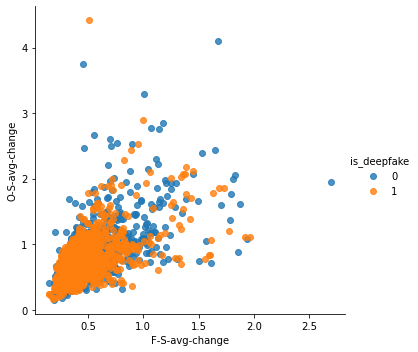

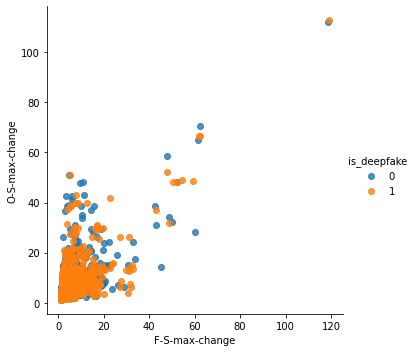

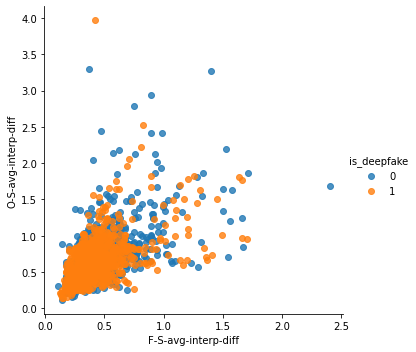

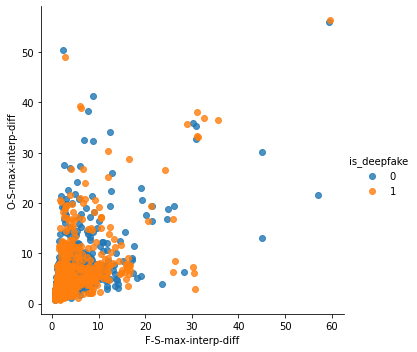

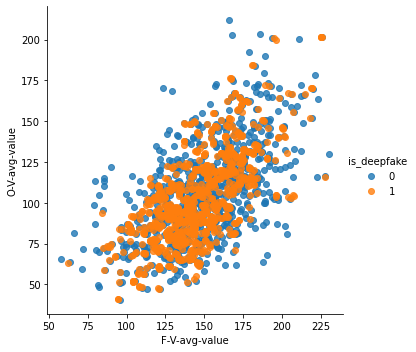

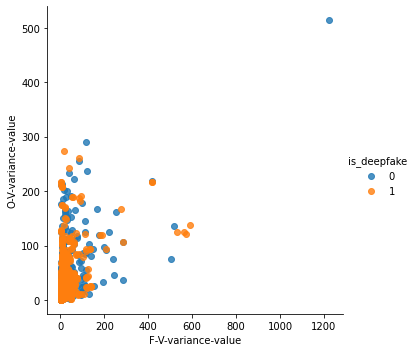

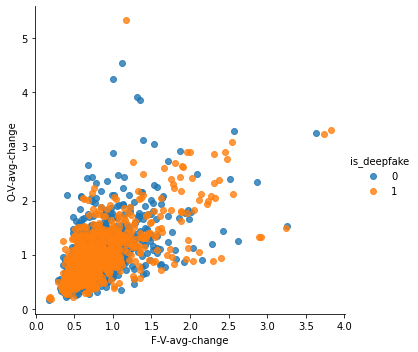

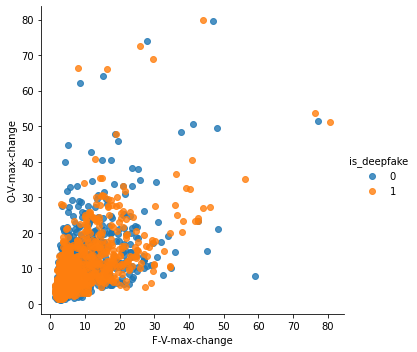

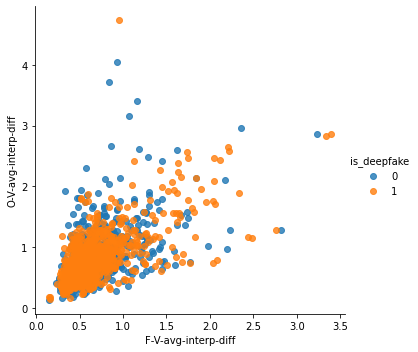

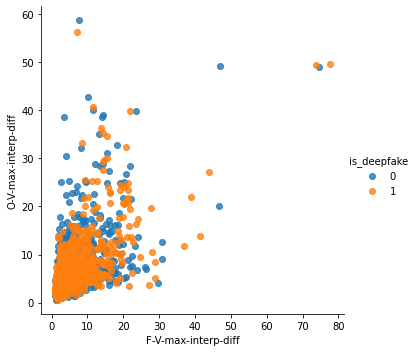

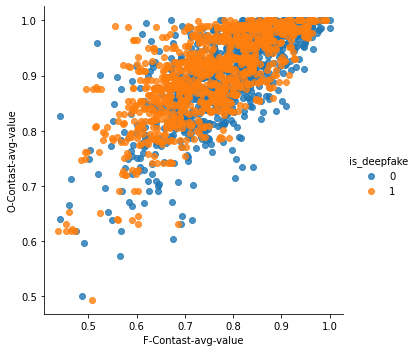

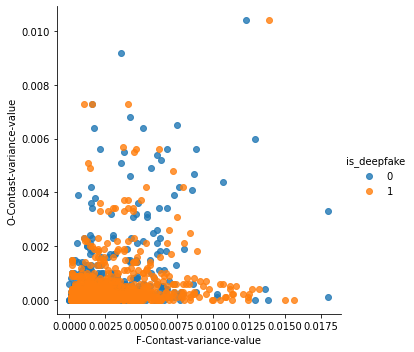

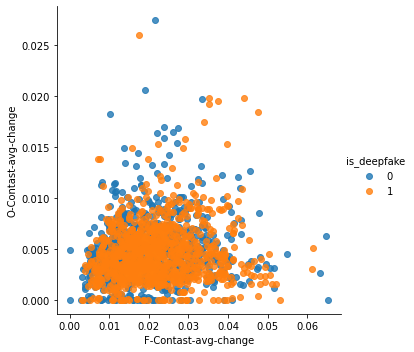

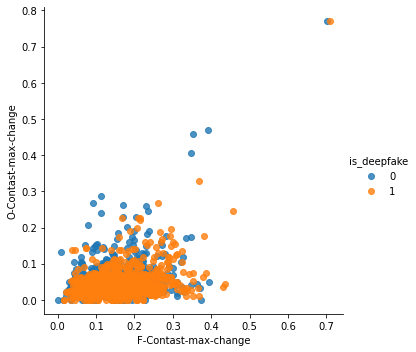

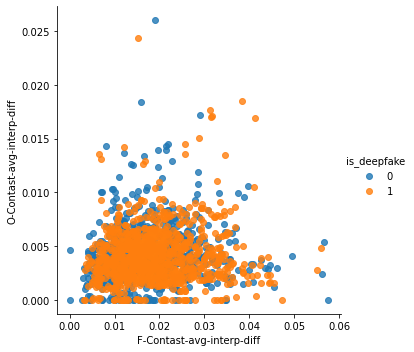

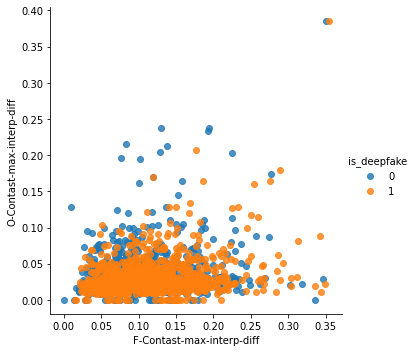

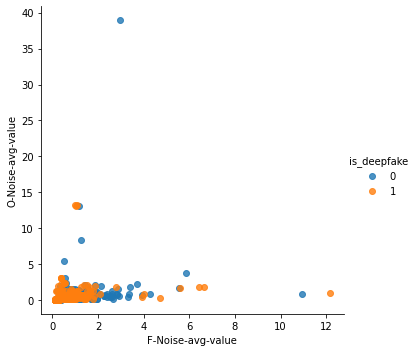

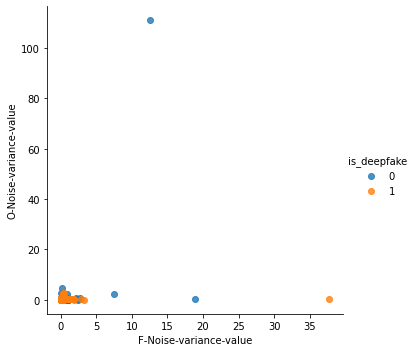

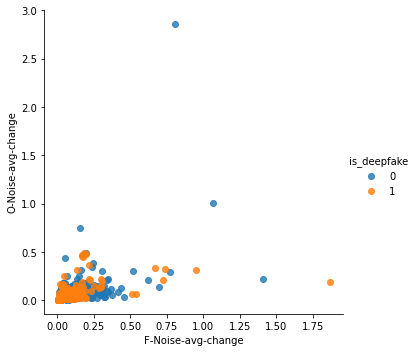

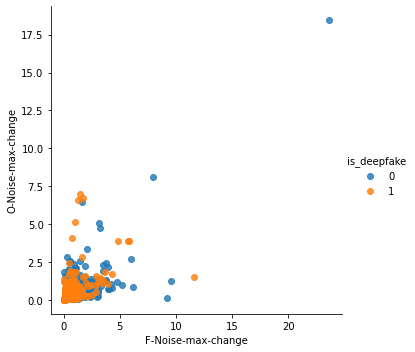

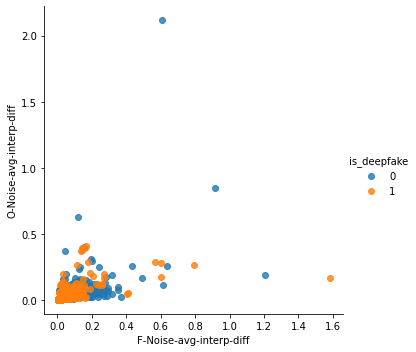

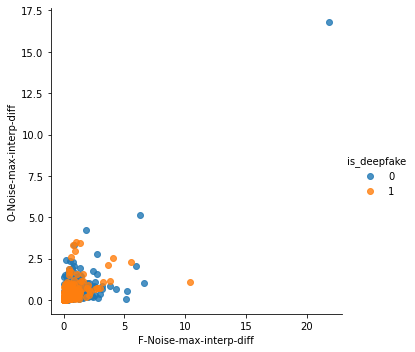

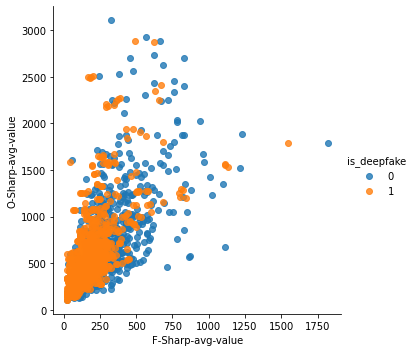

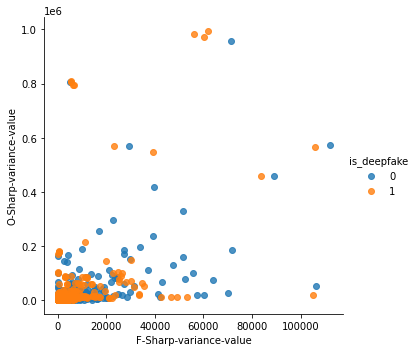

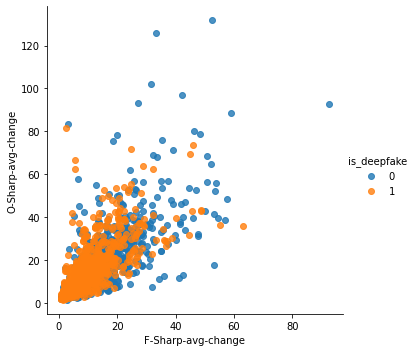

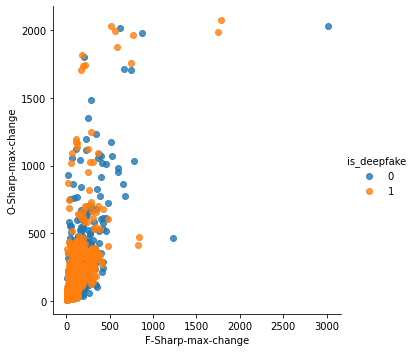

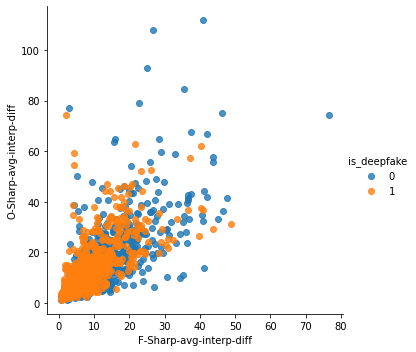

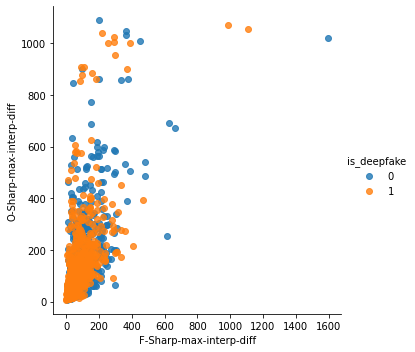

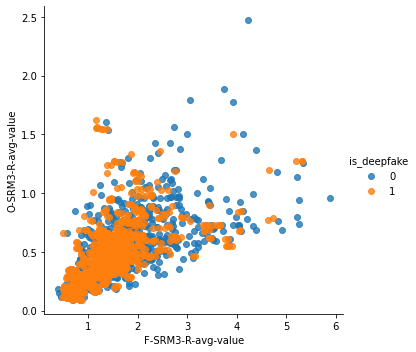

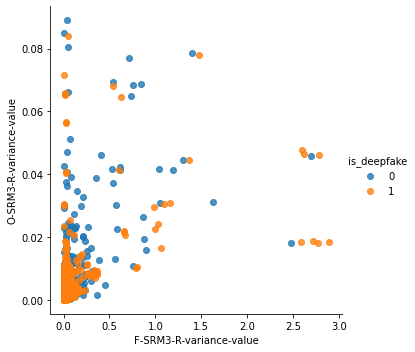

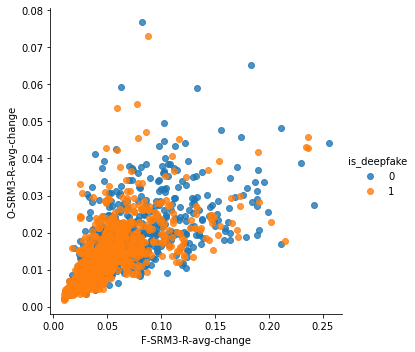

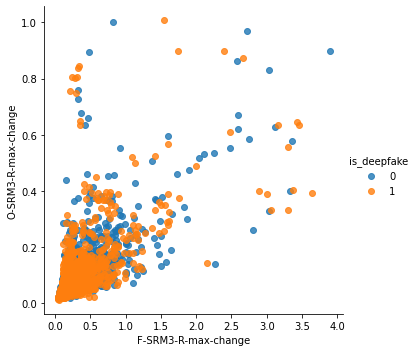

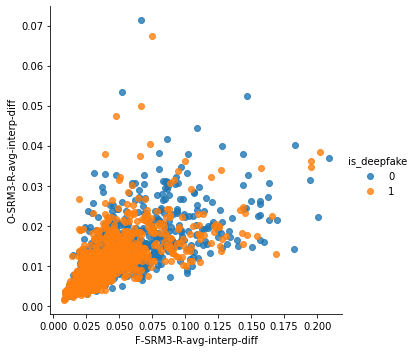

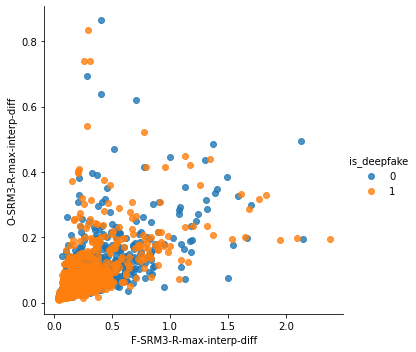

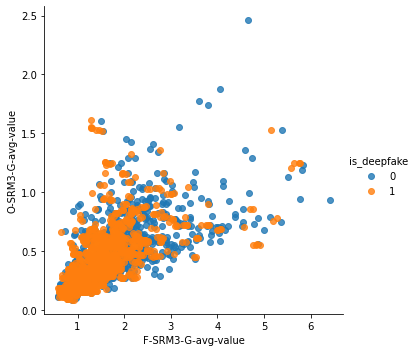

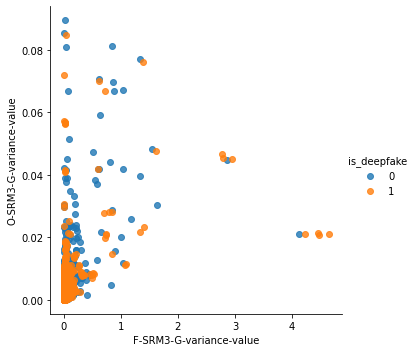

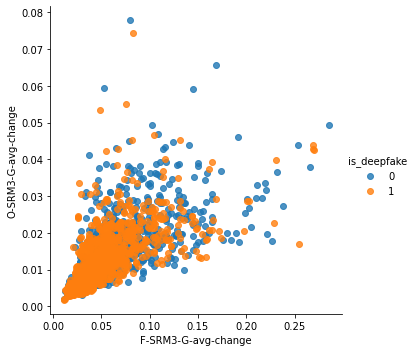

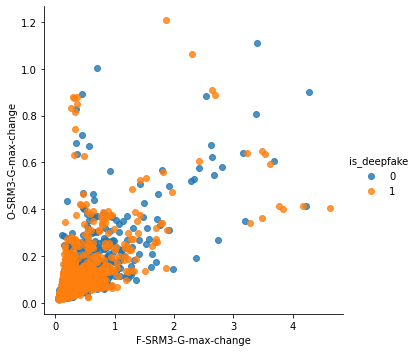

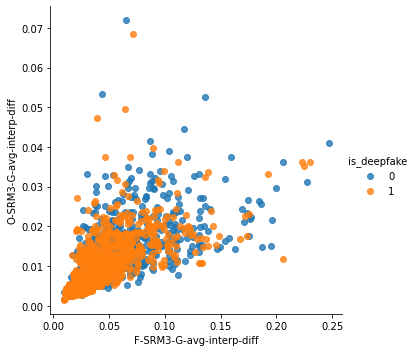

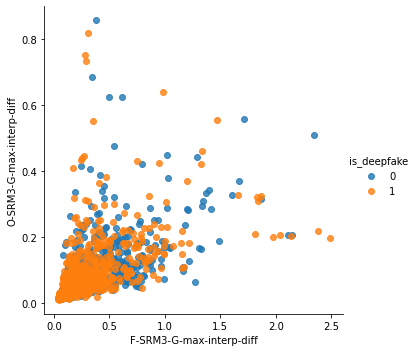

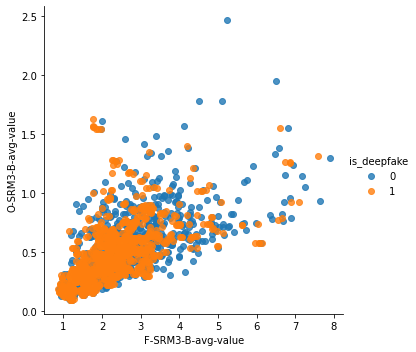

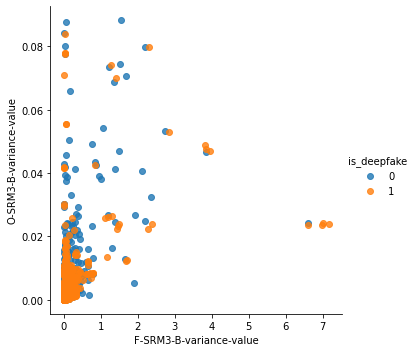

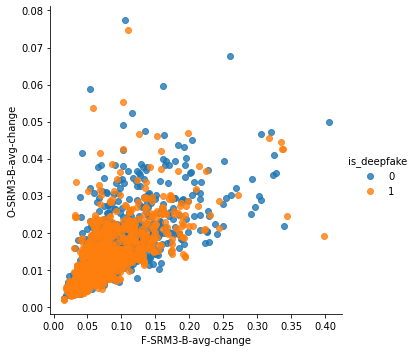

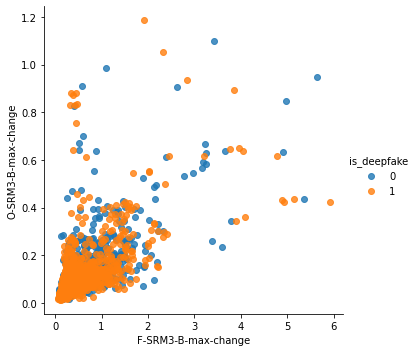

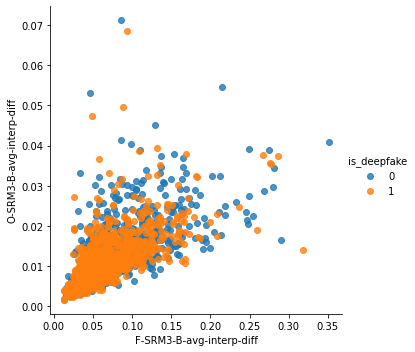

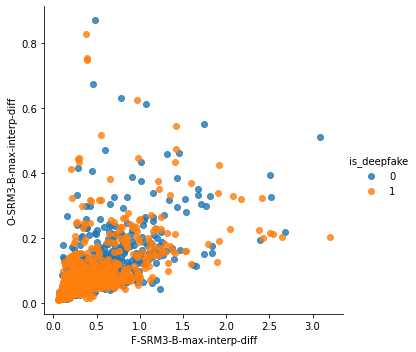

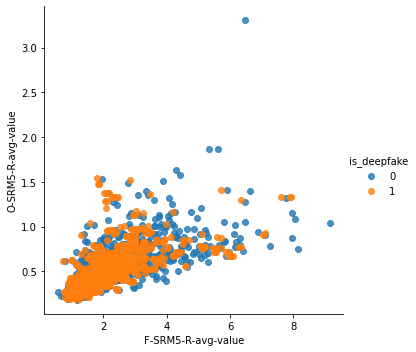

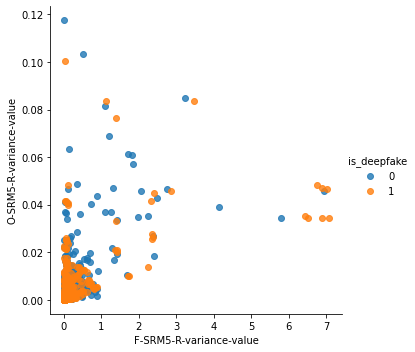

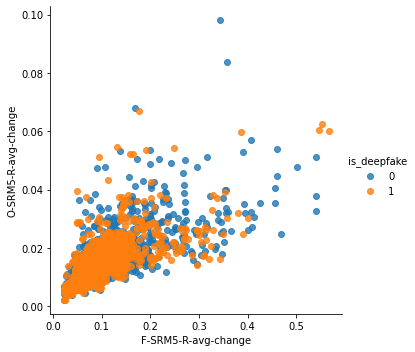

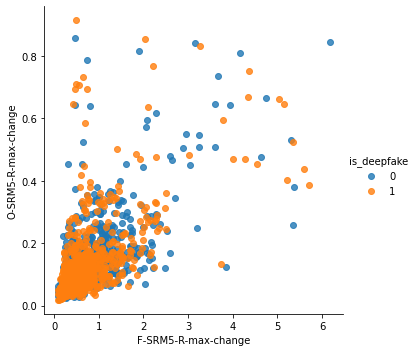

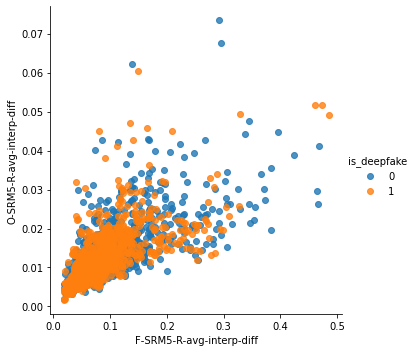

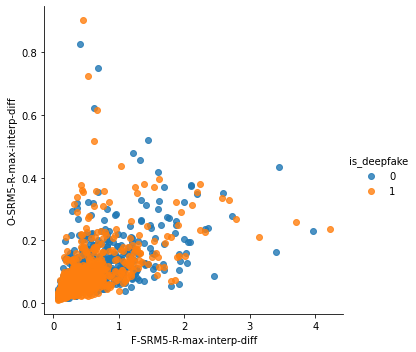

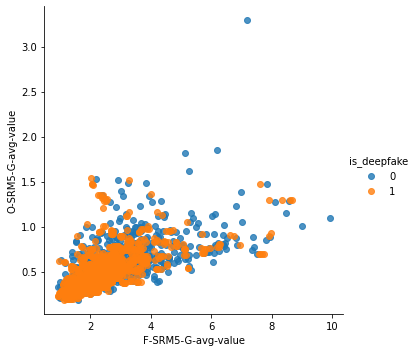

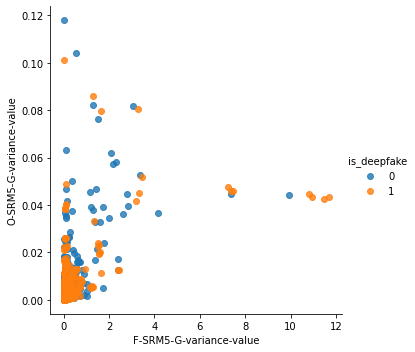

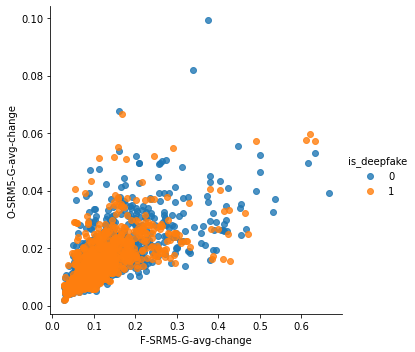

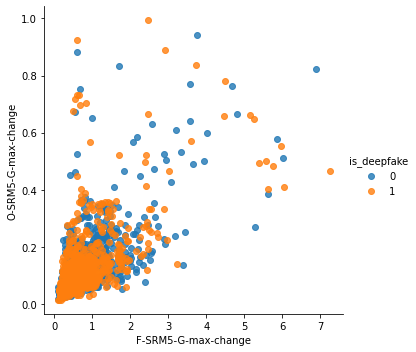

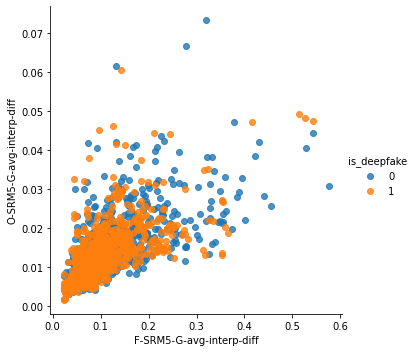

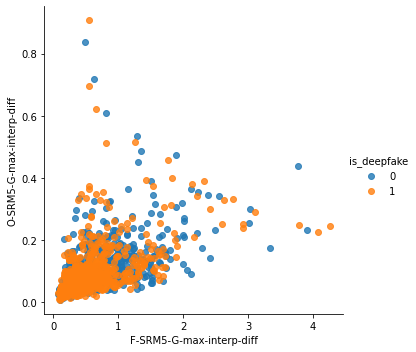

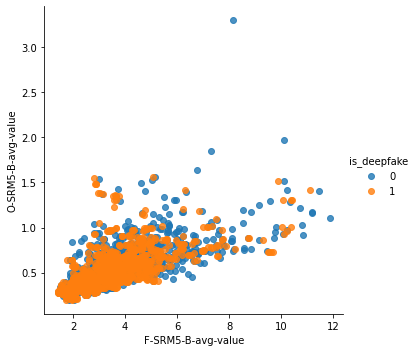

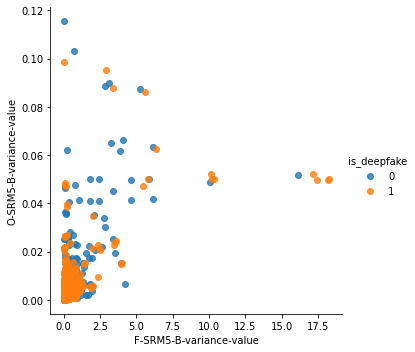

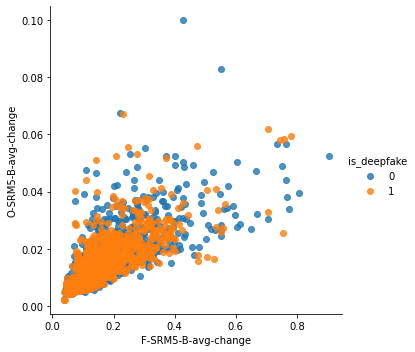

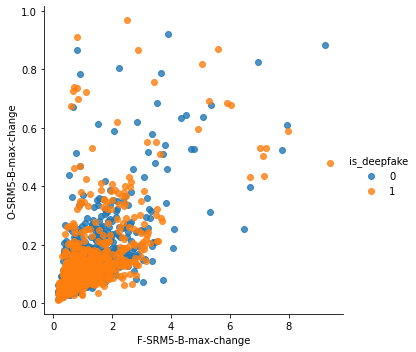

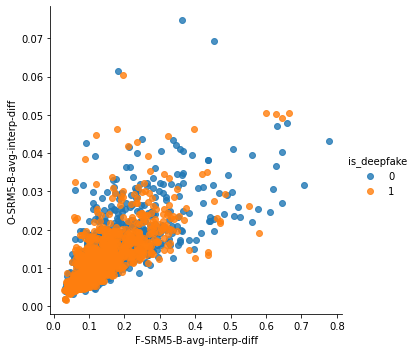

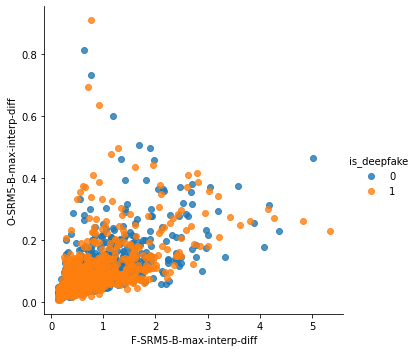

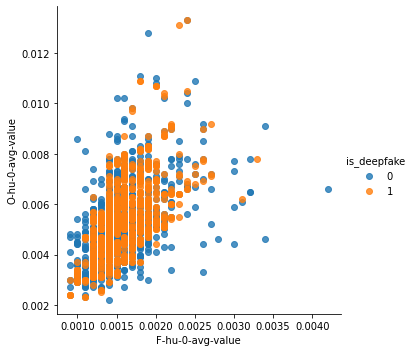

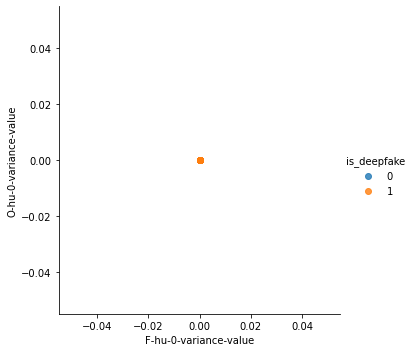

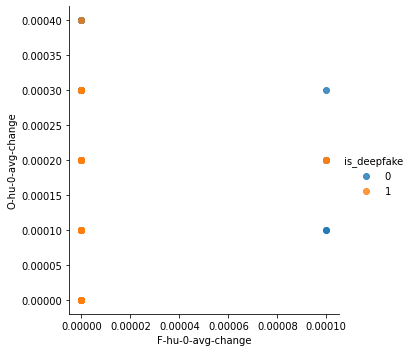

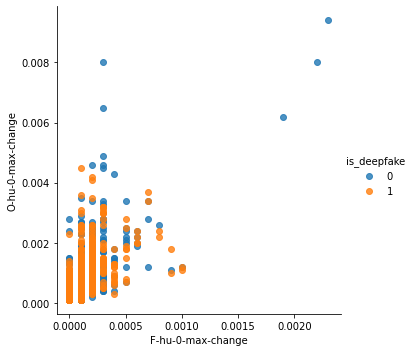

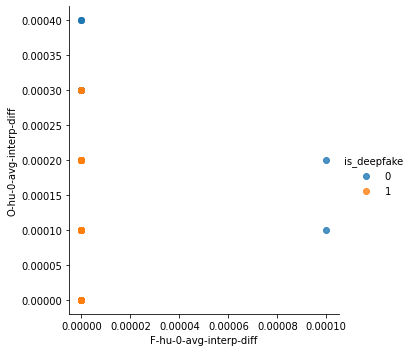

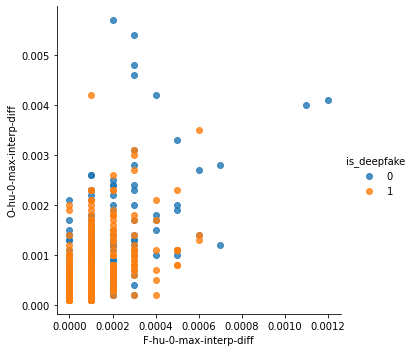

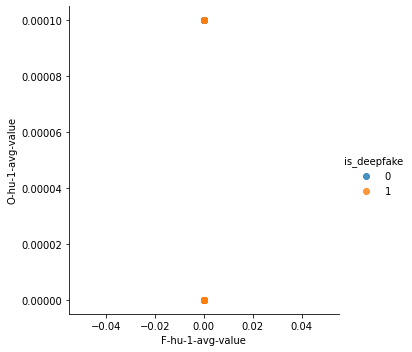

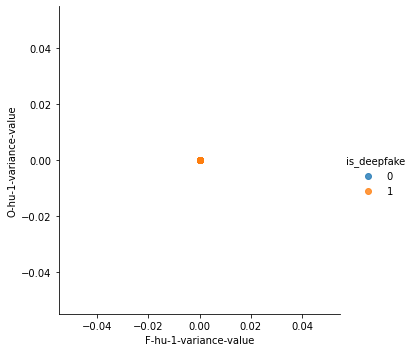

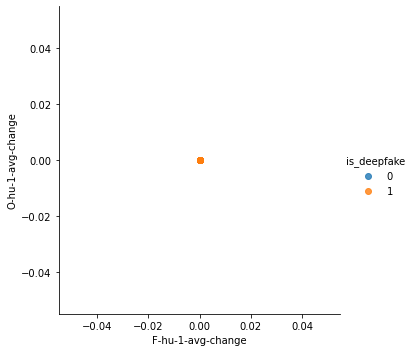

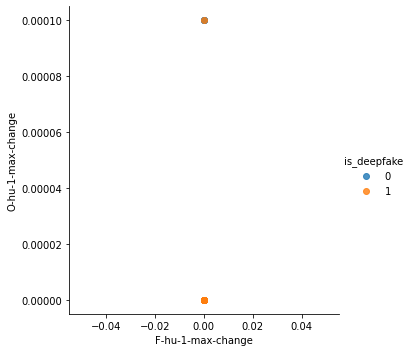

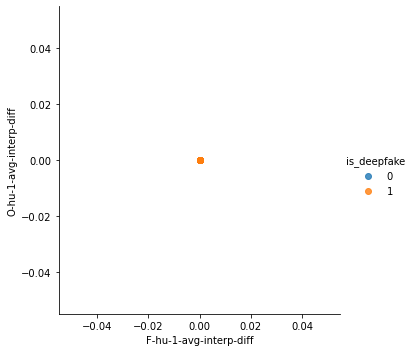

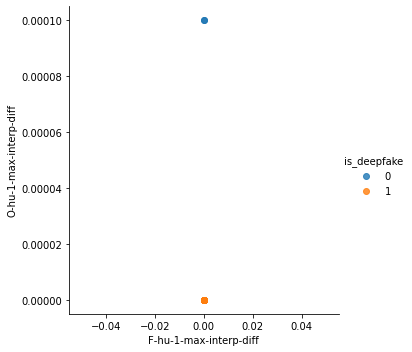

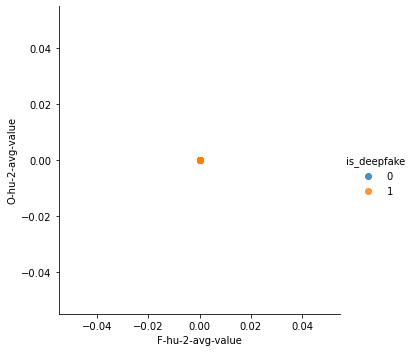

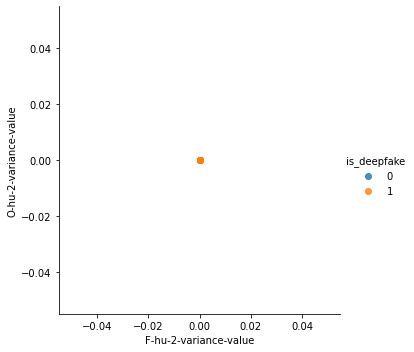

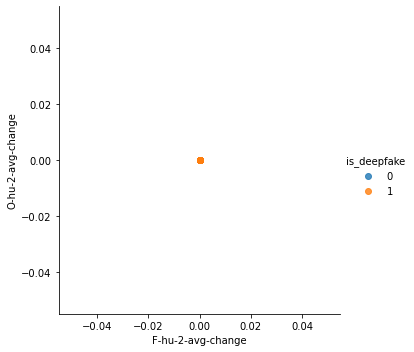

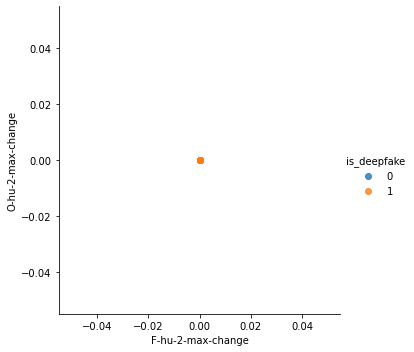

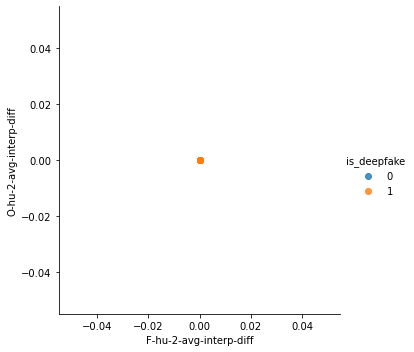

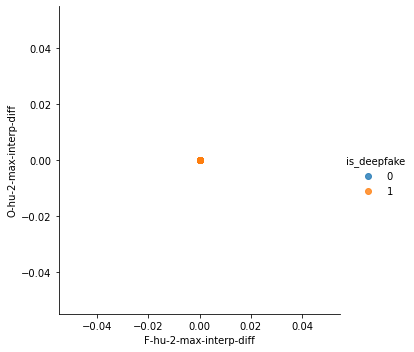

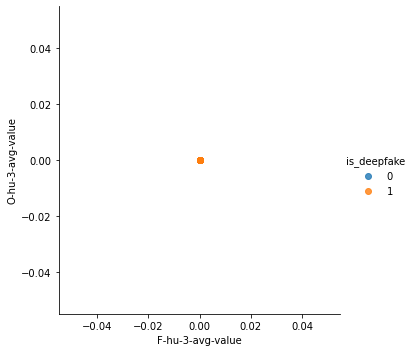

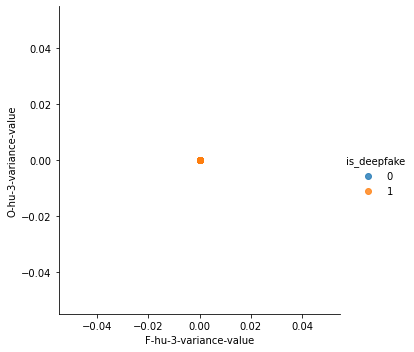

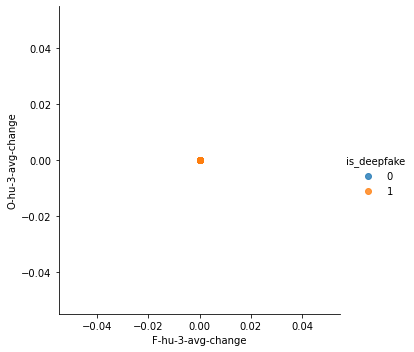

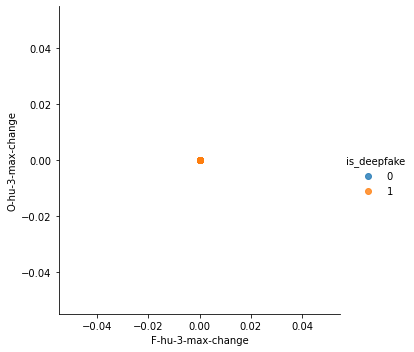

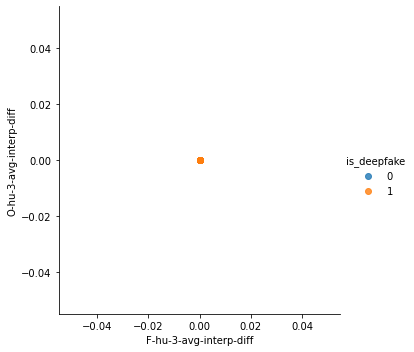

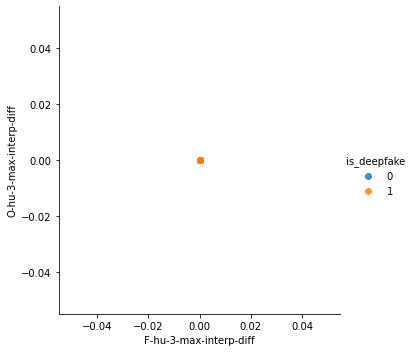

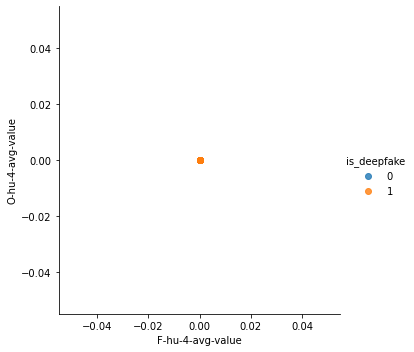

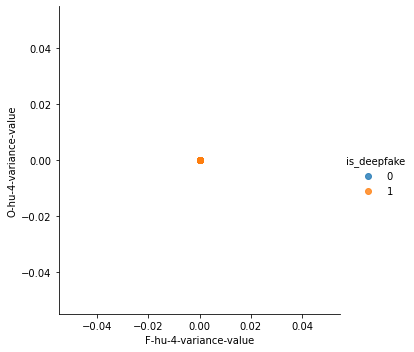

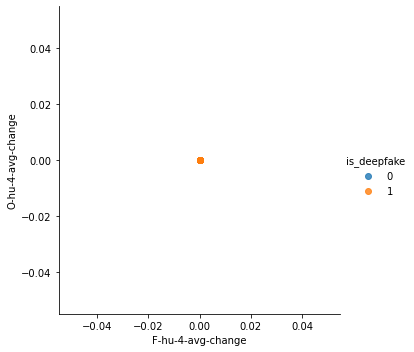

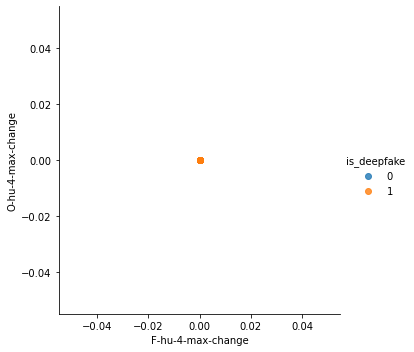

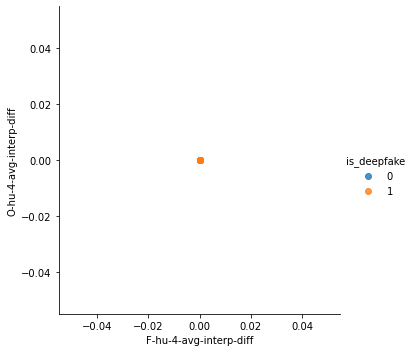

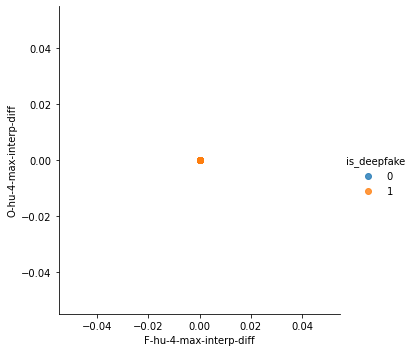

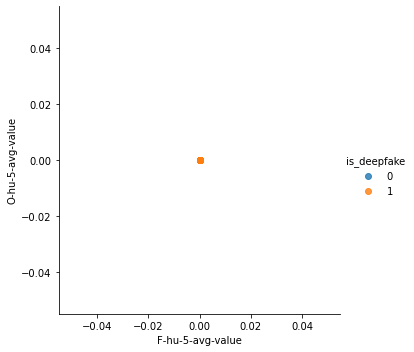

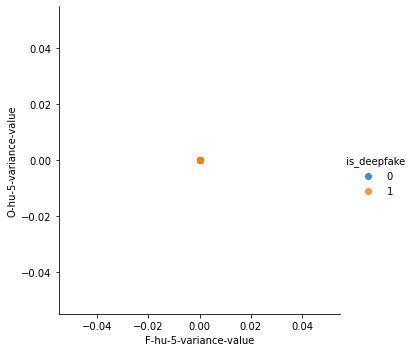

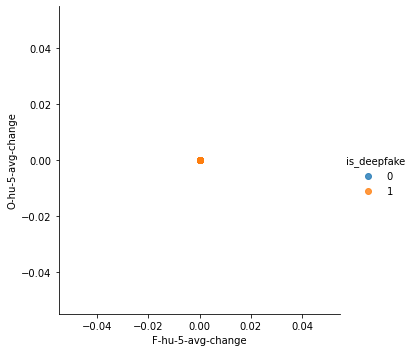

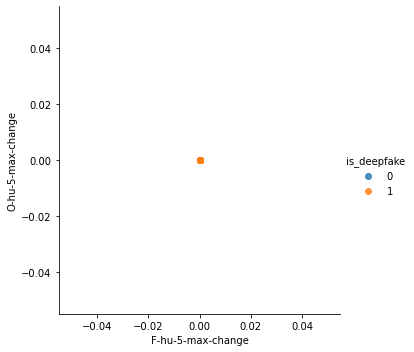

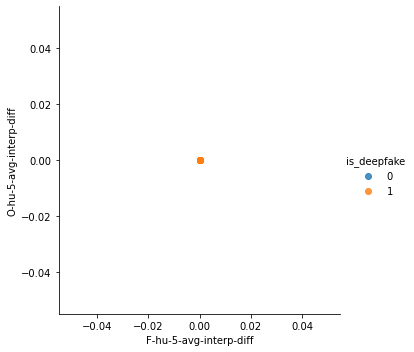

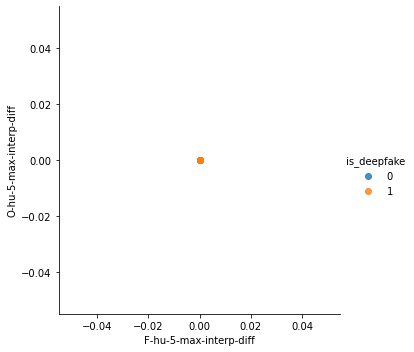

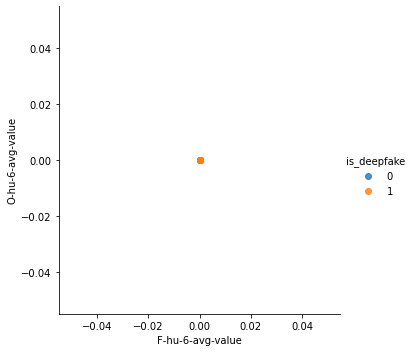

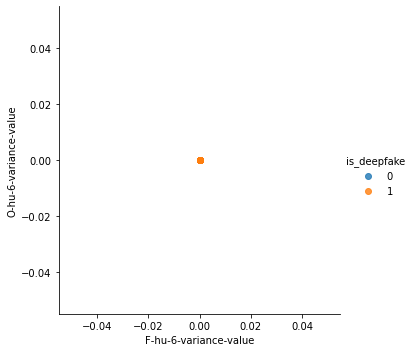

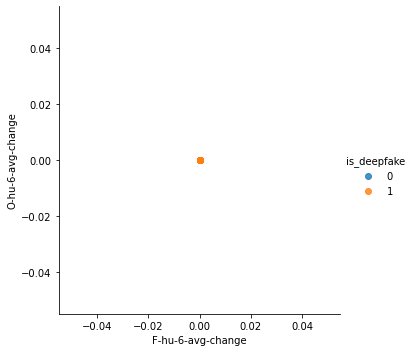

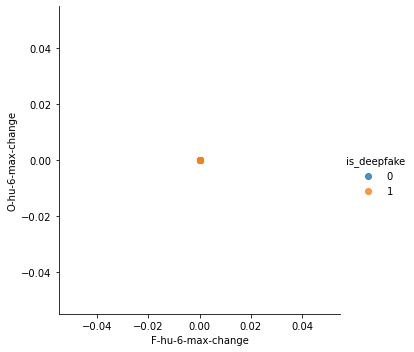

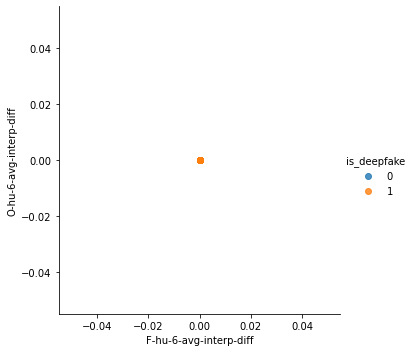

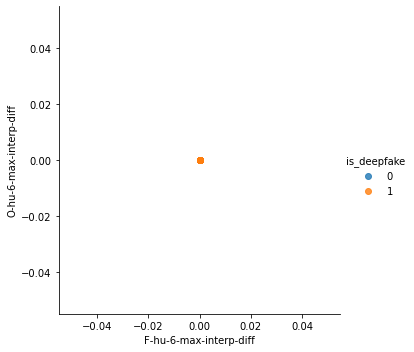

In [10]:
# Pair is the same feature for face ("F-") and outsite ("O-")
pair_features = []
for f1 in facial_features:
    f2 = "O{}".format(f1[1:])
    if f2 in outsite_features:
        pair_features.append((f1, f2))

for idx, (f1, f2) in enumerate(pair_features):
    sns.lmplot(x=f1, y=f2, data=dataset, fit_reg=False, hue=y_label, legend=True)